Einführung in SciPy und SymPy
=============================

1. IPython Grundlagen
------------------------

[IPython](http://ipython.org/) ist eine interaktive Shell für Python. Startet man IPython mit

`> ipython notebook`

wird ein lokaler Webserver gestartet, so daß man mit
einem Browser neue Notebooks erstellen und editieren kann.

Es wird das asynchrone Python-Webserver [tornado](http://www.tornadoweb.org/en/stable/) verwendet, der eine Websocket-Verbindung mit dem Webbrowser herstellt. 

Für die Darstellung mathematischer Formeln wird [MathJax](http://www.mathjax.org/) verwendet, welches einen nützlichen Teil der $\LaTeX$-Syntax versteht.

Das Notebook wird über ipython zu einem `Kernel` verbunden, der in einem separaten laufenden Prozess läuft und die Python-Befehle ausführt. Es sind auch Kernel für [Julia](http://julialang.org/), [R](http://www.r-project.org/) und [Clang](https://github.com/minrk/clingkernel) und viele andere vorhanden.

Ein Notebook besteht aus mehreren "Zellen" (Cells) die Python-Code oder
[Markdown](https://en.wikipedia.org/wiki/Markdown)-formatierten Text enthalten können.


In [2]:
import numpy as np
print(np.__version__)
np

1.9.2


<module 'numpy' from '/home/speter/anaconda/lib/python2.7/site-packages/numpy/__init__.pyc'>

Code-Zellen enthalten eine auch mehrzeilige Eingabe.

Ausgeführt wird der Code in der Zelle mit `CTRL + RETURN`.

Eine neue Zelle erhält man mit `ALT + RETURN`.

Eventuelle Ausgaben auf `sys.stdout` oder `sys.stderr` erscheinen direkt nach der Eingabebereich,
und der letzte Ausdruck wird im gesonderten Ausgabebereich angezeigt.

Wie `vi` unterscheidet `ipython` einen Kommando- und Edit-Modus:
  * Im Kommando-Modus kann man mit den Pfeiltasten die Zellen wechseln, und etwa mit `dd` die aktelle Zelle löschen
  * Mit `RETURN` oder Maus-Doppelklick kommt man in den Edit-Modus, den man mit `ESC` oder `CTRL + RETURN` verlassen kann

In [3]:
# Interaktive Hilfe
np?

2. [numpy](http://www.numpy.org/)
---------------

`numpy` ist eine Python-Bibliothek die effiziente Arrays und darauf operierende Funktionen, die in C, C++ oder FORTRAN implementiert sind, in Python verfügbar macht. Sie steht unter der BSD-Lizenz. Mittlerweile ist sie (konzeptionell) ein Bestandteil von [SciPy](http://www.scipy.org/), kann aber meist separat installiert werden.

`numpy` ist recht umfangreich und leider nicht sehr gut modularisiert, so dass man sich beim ersten Start nicht über einige Gedenksekunden wundern sollte.

### Das Klasse `array`

Das zentrale Objekt in `numpy` ist das `array` (in der Dokumentation auch oft noch `ndarray` genannt).
Es ist ein mehrdimensionaler Container für Elemente des gleichen Datentyps.

In [4]:
np.array?

In [5]:
a = np.array([1,2,3,4], dtype=np.float32)
a

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [6]:
a.shape, a.dtype

((4,), dtype('float32'))

In [7]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [8]:
b = a.reshape( (2,2) )
b

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

In [9]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

Man hieran erkennen, dass `a` eigene Daten besitzt (`OWNDATA: True`) und `b` nicht.
Das spart natürlich Speicher, kann aber auch leicht zu schwer lokalisierbaren Fehlern führen,
denn bei Änderungen an einem Objekt ändert sich auch das andere.


In [10]:
c = np.array( np.reshape(a, (2,2)) )
c.flags.owndata

True

Lineare Bereiche kann man mit `linspace(start, stop, num)` erstellen.
Man beachte, dass der Parameter `num` einen etwas willkürlichen Standardwert von 50 hat,
und man daher besser immer die gewünsche Anzahl eingeben sollte.

In [4]:
lin = np.linspace(1.0, 42.0, 42)
lin

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.])

Arrays können über eckige Klammern indiziert werden. Pro Dimension kann die Slice-Syntax wie bei Python-Listen verwendet werden, `a[start:stop]` oder `a[start:stop:step]`. Der Wert dieses Ausdrucks ist wieder ein Array der entsprechenden Dimension.
Solche Ausdrücke können auch das Ziel einer Zuweisung sein.

In [12]:
rect = np.reshape(lin, (6,7))
rect

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.,  20.,  21.],
       [ 22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.],
       [ 36.,  37.,  38.,  39.,  40.,  41.,  42.]])

In [13]:
# Alle Einträge von Zeile 1
rect[1, :]

array([  8.,   9.,  10.,  11.,  12.,  13.,  14.])

In [14]:
# jeder zweite Eintrag von Spalte 3
rect[::2, 2]

array([  3.,  17.,  31.])

In [5]:
cuboid = np.reshape(lin, (2,3,7))
cuboid

array([[[  1.,   2.,   3.,   4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.,  12.,  13.,  14.],
        [ 15.,  16.,  17.,  18.,  19.,  20.,  21.]],

       [[ 22.,  23.,  24.,  25.,  26.,  27.,  28.],
        [ 29.,  30.,  31.,  32.,  33.,  34.,  35.],
        [ 36.,  37.,  38.,  39.,  40.,  41.,  42.]]])

Zusätzlich zu konkreten Zahlen und Slices kann bei `arrays` auch die `Ellipsis` ... verwendet werden (die Offenbar nur für `numpy` in die Python-Grammatik eingebaut wurde). Diese entspricht der maximalen möglichen Anzahl an `:`-Slices und darf auch nur einmal vorkommen (analog zu `::` in IPv6).

In [16]:
cuboid[1,...]

array([[ 22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.],
       [ 36.,  37.,  38.,  39.,  40.,  41.,  42.]])

In [17]:
cuboid[...,0]

array([[  1.,   8.,  15.],
       [ 22.,  29.,  36.]])

### Arithmetik mit `arrays`

In [18]:
lin + 1

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.])

Was ist da passiert? Die `1` wurde zu jedem Array-Element hinzuaddiert!

Das Verhalten nennt sich `broadcasting`: Numpy versucht, die Dimension(en) der Operanden aneinander anzugleichen.

In diesem Fall wird die `1` als array aufgefasst und die Dimension auf `42` erweitert.

In [19]:
np.broadcast(lin, 1).shape

(42,)

In [20]:
lin*lin

array([  1.00000000e+00,   4.00000000e+00,   9.00000000e+00,
         1.60000000e+01,   2.50000000e+01,   3.60000000e+01,
         4.90000000e+01,   6.40000000e+01,   8.10000000e+01,
         1.00000000e+02,   1.21000000e+02,   1.44000000e+02,
         1.69000000e+02,   1.96000000e+02,   2.25000000e+02,
         2.56000000e+02,   2.89000000e+02,   3.24000000e+02,
         3.61000000e+02,   4.00000000e+02,   4.41000000e+02,
         4.84000000e+02,   5.29000000e+02,   5.76000000e+02,
         6.25000000e+02,   6.76000000e+02,   7.29000000e+02,
         7.84000000e+02,   8.41000000e+02,   9.00000000e+02,
         9.61000000e+02,   1.02400000e+03,   1.08900000e+03,
         1.15600000e+03,   1.22500000e+03,   1.29600000e+03,
         1.36900000e+03,   1.44400000e+03,   1.52100000e+03,
         1.60000000e+03,   1.68100000e+03,   1.76400000e+03])

Im Regelfall sind alle Operationen in `arrays` komponentenweise.

## Übung (Arrays)
  Fülle das 2d-array mit einem Schachbrettmuster, wobei Schwarz=0, Weiß=1

In [21]:
# Schachbrett
chess = np.zeros((10,10))
chess

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Beispiel: Die Mandelbrot-Menge

Betrachte die Folgen $z_{n+1} = z_n + c$ für alle $c\in \mathbb{C}$, $-2 < \textrm{Re } c < 1$, $-1 < \textrm{Im } c < 1$

Die 'Mandelbrot-Menge' ist die Menge aller $c$, für die $z_n$ beschränkt bleibt.

Eine Python-Funktion, welche die Folge berechnet, kann man so schreiben:

In [8]:
def mandel_series(c, numIter):
    series = np.zeros(shape=(numIter,), dtype=np.complex128)
    z = 0+0j
    for i in range(numIter):
        z = z*z + c
        series[i] = z
    return series
mandel_series(0.5+0.4j, 10)

array([  5.00000000e-01 +4.00000000e-01j,
         5.90000000e-01 +8.00000000e-01j,
         2.08100000e-01 +1.34400000e+00j,
        -1.26303039e+00 +9.59372800e-01j,
         1.17484960e+00 -2.02343400e+00j,
        -2.21401359e+00 -4.35446125e+00j,
        -1.35594766e+01 +1.96816728e+01j,
        -2.03008838e+02 -5.33346361e+02j,
        -2.43245252e+05 +2.16548450e+05j,   1.22750214e+10 -1.05348765e+11j])

Das funktioniert, ist aber wenig anschaulich.

3. matplotlib
----------

Im `ipython`-Umfeld ist es sinnvoll, `matplotlib` über die zugehörige Direktive einzubinden
und einige Abkürzungssymbole zu definieren.

Matplotlib ist eine Python-Bibliothek, die unter einer BSD-artigen Lizenz steht und eine Reihe von Backends (wxPython, GTK+, Qt, …) unterstützt. Sie bietet eine ähnliche Funktionalität wie Gnuplot an, verwendet aber Python-Syntax und hat eine Reihe von Abhängigkeiten, zuvorderst `numpy`.

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12,9 # Größe in Inches (!!!)

Die Funktion `plt.plot` generiert einen Plot, der direkt im Notebook angezeigt wird.

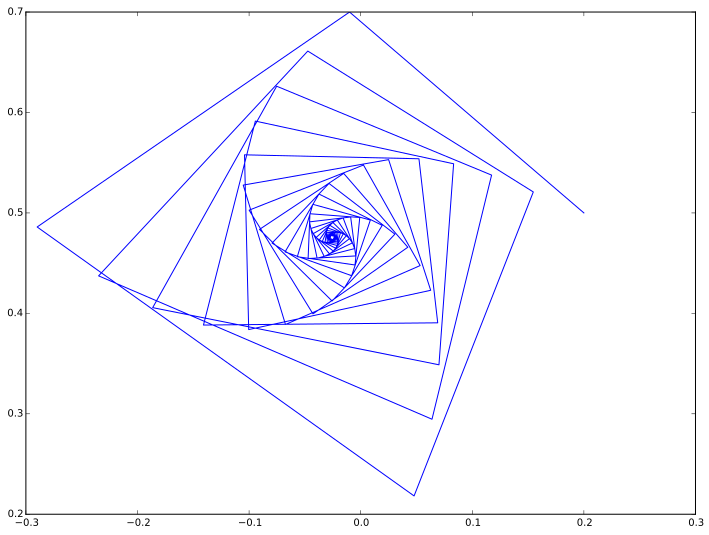

In [13]:
s1 = mandel_series(0.2+0.5j, 100)
plt.plot(s1.real, s1.imag)
plt.show()

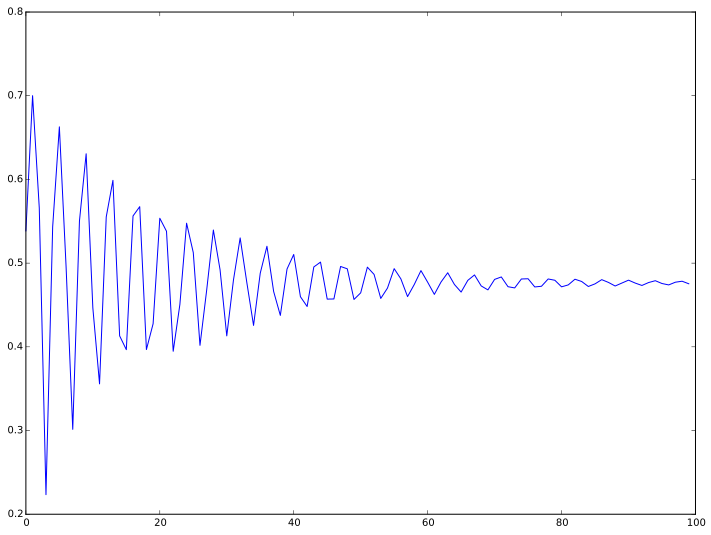

In [14]:
plt.plot(np.abs(s1));

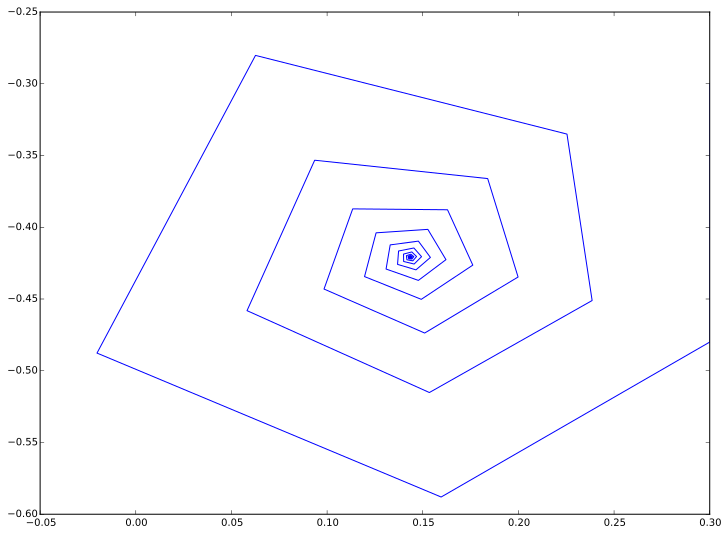

In [15]:
s1 = mandel_series(0.3-0.3j, 1000)
plt.plot(s1.real, s1.imag)
plt.show()

Damit können wir individuell feststellen, welche $c$s zur Mandelbrot-Menge gehören.

Aber vielleicht erkennt man ja ein Muster, wenn man mehrere $c$ gleichzeitig berechnet…

In [16]:
c = np.linspace(-2, 1, 800)+np.linspace(-1, 1, 600).reshape(600,1)*(0+1j)
c.shape, c[0,0], c[599,799]

((600, 800), (-2-1j), (1+1j))

In [17]:
def mandel(c):
    z = np.zeros_like(c)
    for i in range(10):
        z = z*z + c
    return z
z = mandel(c)
z[0,0]

(-9.2568536143635449e+133+9.3386771787027272e+133j)

### Performancemessung in `ipython`

Mit der `%timeit` Direktive kann man in IPython einfach die Geschwindigkeit einer Funktion messen:

In [18]:
%timeit mandel(c)

1 loops, best of 3: 165 ms per loop


In [19]:
(abs(z)<100.0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

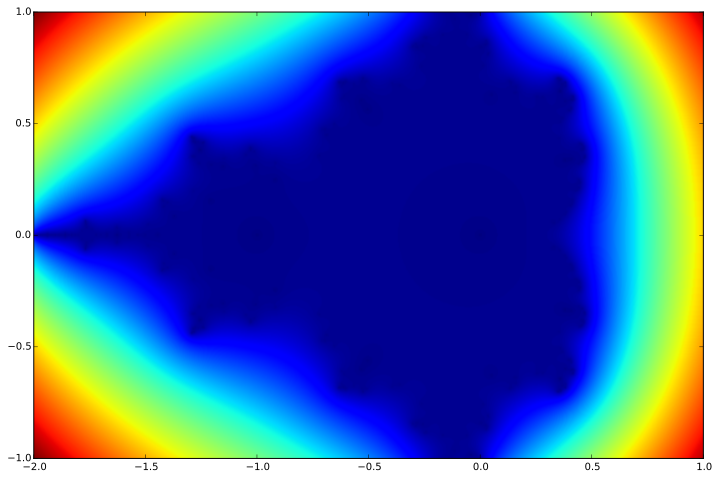

In [20]:
plt.imshow(np.log(abs(z)), extent=(-2,1,-1,1));

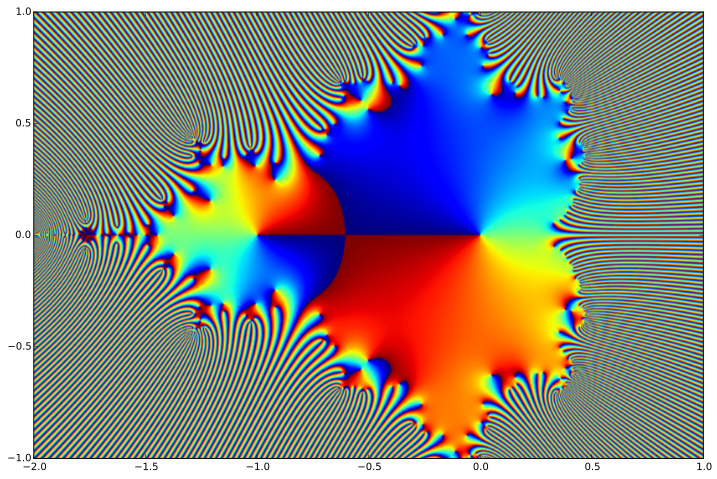

In [21]:
plt.imshow(np.angle(z), extent=(-2,1,-1,1));

In [22]:
def mandel2(c, numIter=10, maxabs=5):
    z = c
    num = np.zeros_like(c, dtype=np.int16)
    for i in range(numIter):
        mask = (abs(z)<maxabs)
        z = mask*(z**2 + c)
        num += (abs(z)<maxabs)
    return z, num

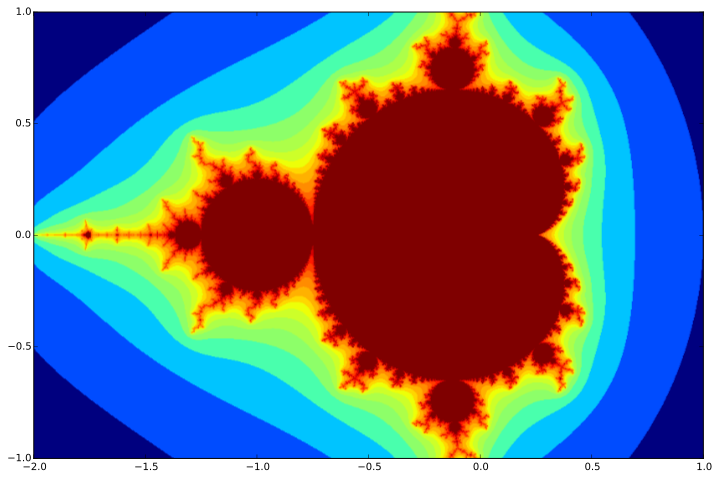

In [23]:
z, num = mandel2(c, 100, 5)
plt.figure(figsize=(12,9))
plt.imshow(num, extent=(-2,1,-1,1));

In [56]:
c

## Übung matplotlib
  * Suche eine interessante Stelle im Apfelmännchen und markiere diese im Plot
  * Suche neue Grenzen um diese Stelle herum, berechene neu und zeichne die Vergrößerung
  * Bestimme und markiere einige Punkte in der Vergrößerung und plotte die zugehörigen Reihen

4. [SymPy](http://www.sympy.org/en/index.html)
--------

SymPy ist ein Computer Algebra System das in reinem Python geschrieben ist.
  * BSD Lizensiert, als Bibliothek in (kommerzieller) Software nutzbar
  * Leichtgewichtig (im Gegenastz zu [Sage](http://www.sagemath.org/)) 

In [24]:
import sympy as sp
sp.init_printing()
a, b = sp.symbols("a b")
a, b

Die Variablen $a$ und $b$ sind nun symbolische Werte, mit denen man in Python-Syntax Ausdrücke und Gleichungen eingeben kann:

In [25]:
greekSyms = sp.symbols("alpha beta gamma delta lamda Delta Sigma")
greekSyms

In [26]:
alpha, beta, gamma = greekSyms[:3]

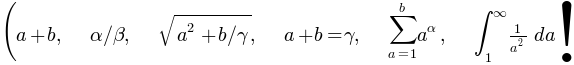

In [27]:
a+b, alpha/beta, sp.sqrt(a**2+b/gamma), sp.Eq(a+b,gamma), sp.Sum(a**alpha, (a, 1, b)), sp.Integral((1/a)**2,(a,1,sp.oo))

Für Ausdrücke wie Integrale, die eventuell ausgewertet werden können, kann man mit der Methode `.doit()` diese Auswertung anstossen:

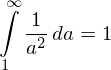

In [38]:
intExpr = sp.Integral((1/a)**2,(a,1,sp.oo))
sp.Eq(intExpr, intExpr.doit())

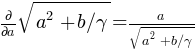

In [28]:
rootExpr = sp.sqrt(a**2+b/gamma)
sp.Eq(sp.Derivative(rootExpr, a), rootExpr.diff(a))

*Merke*: Großgeschriebene Bezeichner (`Sum`, `Derivative`, `Integral`) erhalten die symbolische Operation,
kleingeschriebene (`sum`, `diff`, `integrate`) Verben führen die Operation gleich durch.

In SymPy-Ausdrücken kann man mit `sp.subst` konkrete Werte einsetzen:

In [40]:
valDict = dict(a=sp.pi, b=sp.E)
(a+b).subs(valDict)

Wer es noch konkreter mag, kann `evalf` verwenden:

In [41]:
(a+b).subs(valDict).evalf(100)

In [42]:
binom = (a+b)**5
binom.doit()

`doit()` führt nur Berechnungen aus (wie Summen, Ableitungen und Integrale), für Umformungen stehen unter anderem Folgende Funktionen zur Verfügung:

In [43]:
polynom = sp.expand(binom)
polynom

In [44]:
sp.factor(polynom)

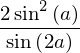

In [45]:
sp.tan(a).rewrite(sp.sin)

In [70]:
sp.sin(a).series(a,n=10) #.removeO()

In [72]:
def toLaTeX(symExpr):
    return "$"+sp.latex(symExpr)+"$"

### Zusammenspiel `sympy` und `numpy`

Symbolische Berechnungen sind schön und gut, aber auch recht langsam.
die Funktion `lambdify` kann einen `sympy`-Ausdruck in eine `numpy`-Funktion umwandeln, die man dann wie gehabt plotten kann.

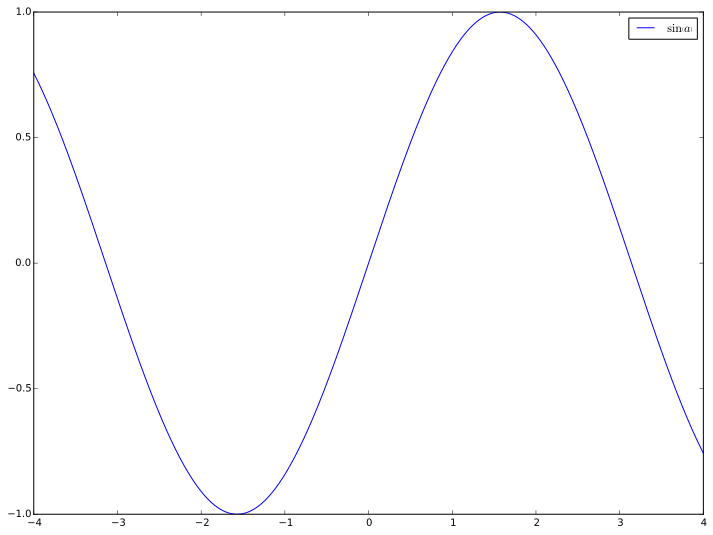

In [74]:
domain = np.linspace(-4, 4, 1000)
origFunc = sp.sin(a)
numFunc = sp.lambdify(a, origFunc, "numpy")
plt.plot(domain, numFunc(domain), label=toLaTeX(origFunc))
#for i in range(11)[3::2]:
#    symFunc = origFunc.series(a, n=i).removeO()
#    numFunc = sp.lambdify(a, symFunc, "numpy")
#    plt.plot(domain, numFunc(domain), label=toLaTeX(symFunc))
plt.legend()
plt.show()

### Übung Reihenentwicklung von $\sin(x)$

Stelle die ersten 10 Approximationen von $\sin(x)$ durch die Potenzreihe dar.

## Dateiformat von Notebooks

Die Notebooks werden im im [JSON](https://en.wikipedia.org/wiki/JSON)-Format in Dateien mit der Endung `.ipynb` gespeichert.

Diese lassen sich per 

`> ipython nbconvert --to latex|pdf|html` Dateiname.ipynb

nach LaTeX, PDF, HTML und weitere Formate exportieren.

Allerdings wird dafür eine funktionierende LaTeX-Installation sowie [pandoc](http://pandoc.org/) vorausgesetzt.

Bilder und Formeln werden in einer String-Codierung gespeichert, wodurch Notebook-Files schnell anwachsen können. Um die Dateien klein zu halten und reproduzierbare Ergebnisse zu erhalten, kann man vor dem Speichern über `Cell -> All Output -> clear` die Ausgaben löschen und nach dem Laden `Cell -> Run All` ausführen.